## Meteomatics Weather / Ocean Data and Forecasts
This block provides access to a REST-style API to retrieve historic, current, and forecast data globally.

Meteomatics provides high quality weather data in a spatial resolution up to 90m. All data are available worldwide and they are based on the best numerical models, enhanced by downscaling methods and station calibration methodology. All model data and observational data are available as time series in NetCDF format. Here we use the [NetCDF -> GeoTIFF Conversion](https://marketplace.up42.com/block/e826be64-827b-4df9-b32d-56c528b8050d) to convert the output to GeoTIFF.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/235addd2-3efe-424b-8c35-d9b41dfe0eb5) and [Documentation](https://docs.up42.com/up42-blocks/data/weather-ocean-data-forecasts-meteomatics.html).

In [1]:
import up42

In [2]:
# add credential and authenticate
up42.authenticate(project_id="12345", project_api_key="12345")
project = up42.initialize_project()

# Construct workflow
workflow = project.create_workflow(name="meteomatics-workflow", use_existing=False)

2021-03-12 08:59:26,395 - Authentication with UP42 successful!
2021-03-12 08:59:27,002 - Initialized Project(name: Blocks, project_id: 810e8039-cb5c-445b-b08d-53b0dde1bde0, description: , createdAt: 2020-07-13T14:32:49.406Z)
2021-03-12 08:59:27,308 - Created new workflow: dabb3f7b-11e4-4ff1-8f50-d8bd7902156d


In [3]:
input_tasks = ["meteomatics", "data-conversion-netcdf"]
workflow.add_workflow_tasks(input_tasks)

2021-03-12 08:59:30,669 - Added tasks to workflow: [{'name': 'meteomatics:1', 'parentName': None, 'blockId': '235addd2-3efe-424b-8c35-d9b41dfe0eb5'}, {'name': 'data-conversion-netcdf:1', 'parentName': 'meteomatics:1', 'blockId': 'e826be64-827b-4df9-b32d-56c528b8050d'}]


In [4]:
# Define the aoi 
berlin_example_aoi = {"type":"Feature","properties":{},
   "geometry":{"type": "Polygon","coordinates": [[[13.384292,52.476387],
                                                  [13.387612,52.476407],
                                                  [13.387844,52.470423],
                                                  [13.384436,52.470499],
                                                  [13.384292,52.476387]]]}}
# other options to define aoi include up42.draw_aoi(), up42.read_vector_file(), FeatureCollection, GeoDataFrame etc.

In [5]:
# Get input parameters
workflow.get_parameters_info()

2021-03-12 08:59:31,060 - Got 2 tasks/blocks in workflow dabb3f7b-11e4-4ff1-8f50-d8bd7902156d.


{'meteomatics:1': {'bbox': {'type': 'array', 'default': None},
  'time': {'type': 'dateRange',
   'default': '2020-01-01T00:00:00+00:00/2021-12-31T23:59:59+00:00'},
  'variables': {'type': 'array',
   'default': ['t_2m:C', 'precip_5min:mm', 'wind_speed_100m:ms']},
  'intersects': {'type': 'geometry'},
  'time_series': {'type': 'array', 'default': None},
  'time_interval': {'type': 'integer', 'default': 6}},
 'data-conversion-netcdf:1': {}}

In [6]:
# Define input parameters of the workflow to run it
input_parameters = workflow.construct_parameters(geometry=berlin_example_aoi, 
                                                 geometry_operation="intersects", 
                                                 start_date="2020-01-01",
                                                 end_date="2020-01-02")

In the above code cell, we added th basic input parameters. However, the block accepts additional parameters as per workflow.get_parameters_info(). Please refer to the [UP42 Documentation](https://docs.up42.com/up42-blocks/data/weather-ocean-data-forecasts-meteomatics.html) and the [Meteomatics Documentation](https://www.meteomatics.com/en/api/available-parameters/standard-weather-parameter/) for additional examples of variables. You can add the parameters to our parameter configuration in the following steps:

In [9]:
input_parameters["meteomatics:1"].update({"time_interval": 6,
                                                     "variables": ['t_2m:C', 'precip_5min:mm', 'wind_speed_200m:kmh']})
# Check if everything is as expected
print(input_parameters)

{'meteomatics:1': {'time': '2020-01-01T00:00:00Z/2020-01-02T23:59:59Z', 'variables': ['t_2m:C', 'precip_5min:mm', 'wind_speed_200m:kmh'], 'time_interval': 6, 'intersects': {'type': 'Polygon', 'coordinates': (((13.384292, 52.476387), (13.387612, 52.476407), (13.387844, 52.470423), (13.384436, 52.470499), (13.384292, 52.476387)),)}}, 'data-conversion-netcdf:1': {}}


In [10]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-12 08:59:57,224 - Estimated: 22-22 Credits, Duration: 0-0 min.


{'meteomatics:1': {'blockConsumption': {'resources': {'unit': 'DATA_POINT',
    'min': 192,
    'max': 192},
   'credit': {'min': 20, 'max': 20}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}},
 'data-conversion-netcdf:1': {'blockConsumption': {'resources': {'unit': 'SCENE',
    'min': 3,
    'max': 3},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [11]:
# Run the actual job
job = workflow.run_job(input_parameters, track_status=True)


2021-03-12 08:59:57,233 - Selected input_parameters: {'meteomatics:1': {'time': '2020-01-01T00:00:00Z/2020-01-02T23:59:59Z', 'variables': ['t_2m:C', 'precip_5min:mm', 'wind_speed_200m:kmh'], 'time_interval': 6, 'intersects': {'type': 'Polygon', 'coordinates': (((13.384292, 52.476387), (13.387612, 52.476407), (13.387844, 52.470423), (13.384436, 52.470499), (13.384292, 52.476387)),)}}, 'data-conversion-netcdf:1': {}}
2021-03-12 09:00:02,811 - Created and running new job: 0b89d547-8f93-4085-8908-effd8fbb8201.
2021-03-12 09:00:03,127 - Tracking job status continuously, reporting every 30 seconds...
2021-03-12 09:00:35,586 - Job finished successfully! - 0b89d547-8f93-4085-8908-effd8fbb8201


In [ ]:
# Download and plot results
job.download_results()

Each variable output (i.e wind_speed_200m, t_2m etc.) contains several bands describing the collected data at each time step. Here we plot the first band of each variable. (Lower values are visualized in lighter colors whilst higher values visualized in darker colors)

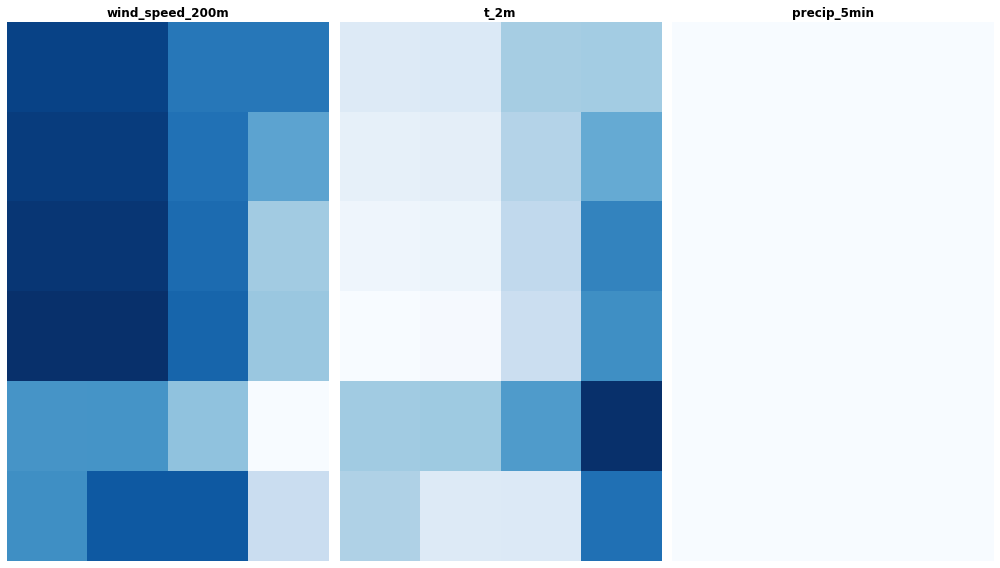

In [31]:
job.plot_results(bands=[1], cmap="Blues")